# Metabolism at a glance - Exercises

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import numpy

Hint: Use page 76 and forward in Villadsen et al
An average biomass elemental composition of CH1.8O0.5N0.2 may be used

## Batch data analysis

A yeast strain was cultivated in batch culture under anaerobic conditions and samples were analyzed for the dry weight, glucose, ethanol and glycerol concentrations.

Let's read the file using pandas.

In [5]:
batch_data = pd.read_csv("data/batch-data-analysis-data.csv")
batch_data

,time [h],biomass [DW g/l],glucose [g/l],ethanol [g/l],glycerol [g/l]
0,0.00,0.0068,NaN,NaN,NaN
1,0.50,0.0100,20.02,0.00,0.01
2,2.42,0.0150,20.09,0.02,0.02
3,4.50,0.0190,20.00,0.03,0.02
4,6.34,0.0286,19.68,0.04,0.05
5,9.25,0.0608,19.47,0.17,0.15
6,11.34,0.1100,19.21,0.31,0.32
7,14.17,0.2300,18.12,0.68,0.36
8,17.17,0.4920,15.47,1.55,0.73
9,17.84,0.5560,14.34,1.96,0.82


### a)

Plot the data, find the region with the exponential growth and find $μ_{max}$.
Hints: you could use [https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html]() for example to fit a function to the data. You will have to define a Python function for that purpose (either using `def` or `lambda`). You can take a look at [https://data-science-for-biotech.github.io/python-novice-inflammation/08-func/index.html]() in case you have never defined a Python function before. If this is too tough, you could resort to Excel to determine $mu_{max}$ or estimate it by eye (using a logarithmic plot).

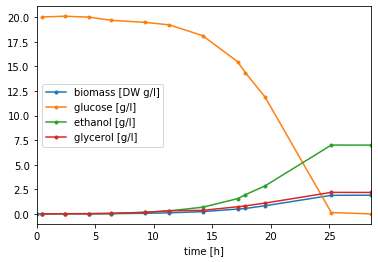

In [6]:
batch_data.plot(x='time [h]', style='.-');

### b) 

During exponential growth the yield coefficients should be constant. Prove it by plotting. Calculate the yield coefficients for biomass, ethanol and glycerol on glucose (Ysx, Yse, and Ysg) in g/g and in Cmol/Cmol.
Assume the generalized composition of the biomass: $CH_{1.8}O_{0.5}N_{0.2}$.

### c)

Make a C balance and calculate the yield of CO2 on glucose ($Y_{sc}$).

### d)

Using the calculated μmax and yield coefficients, calculate the specific consumption rate for glucose ($r_s$) and specific production rates for ethanol, glycerol and CO2 ($r_e$, $r_g$, and $r_c$). Use units of C-mmol/g DW·h.